# Cap 2 - 2.6 - Probabilidade

In [1]:
# %matplotlib inline
import random
import torch
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l


num_tosses = 100 # número de sorteios
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])   # foi utilizado '_' no lugar de um i qualquer
tails = num_tosses - heads   # tails = coroas;  heads = caras.
print("heads, tails: ", [heads, tails])

heads, tails:  [44, 56]


Para simular dez lançamentos de uma moeda justa, atribuímos o vetor de probabilidade , interpretando o
índice 0 como cara e o índice 1 como coroa.

A função retorna um vetor com comprimento igual ao número de resultados possíveis (aqui, 2),
onde o primeiro componente nos informa o número de ocorrências de cara e o segundo componente
nos informa o número de ocorrências de coroa.[0.5, 0.5]


Cada vez que você executar esse processo de amostragem, receberá um novo valor aleatório que pode ser diferente
do resultado anterior. Dividir pelo número de lançamentos nos dá a frequência de cada resultado em nossos dados.

In [2]:
fair_probs = torch.tensor([0.5, 0.5])  # tensor de probabilidade justa: a chance é 0.5 a 0.5 de cair cara ou coroa
Multinomial(100, fair_probs).sample()  # Simula 100 lançamentos automáticos. Out: tensor([51., 49.])
# # teste:
# a = Multinomial(100, fair_probs).sample()
# b = a[0] + a[1]  # Out: tensor(100.)
Multinomial(100, fair_probs).sample() / 100 # Normalizado. Somatório é 1.

# Vamos ver o que acontece quando simulamos 10.000 lançamentos.
counts = Multinomial(10000, fair_probs).sample()  # Out: tensor([5049., 4951.])
counts / 10000  # Out: tensor([0.5049, 0.4951]). Normalizado. Somatório é 1.

tensor([0.5074, 0.4926])

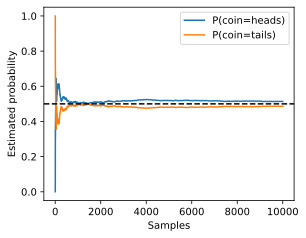

In [3]:
# Vamos obter mais intuição estudando como nossa estimativa evolui à medida que aumentamos o número de
# lançamentos de 1 para 10.000.
counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()

d2l.set_figsize((4.5, 3.5))
d2l.plt.plot(estimates[:, 0], label=("P(coin=heads)"))
d2l.plt.plot(estimates[:, 1], label=("P(coin=tails)"))
d2l.plt.axhline(y=0.5, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Samples')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

# Exercício 3: Esperança (espectativa) para n lançamentos

tensor(0.4000)
tensor(0.5000)
tensor(0.6000)
tensor(0.5000)
tensor(0.7000)
tensor(0.6000)
tensor(0.6000)
tensor(0.7000)
tensor(0.4000)
tensor(0.4000)
tensor(0.4600)
tensor(0.4800)
tensor(0.4700)
tensor(0.4900)
tensor(0.5800)
tensor(0.4700)
tensor(0.5400)
tensor(0.5000)
tensor(0.5500)
tensor(0.4600)
tensor(0.4500)
tensor(0.5100)
tensor(0.5000)
tensor(0.4800)
tensor(0.5100)
tensor(0.4900)
tensor(0.5600)
tensor(0.5300)
tensor(0.5000)
tensor(0.5600)
tensor(0.4900)
tensor(0.4900)
tensor(0.6200)
tensor(0.5100)
tensor(0.4700)
tensor(0.4800)
tensor(0.4800)
tensor(0.5400)
tensor(0.4800)
tensor(0.4800)
tensor(0.6300)
tensor(0.5400)
tensor(0.5400)
tensor(0.4300)
tensor(0.4700)
tensor(0.4900)
tensor(0.3700)
tensor(0.5800)
tensor(0.4600)
tensor(0.4400)
tensor(0.5100)
tensor(0.5500)
tensor(0.4400)
tensor(0.4300)
tensor(0.4800)
tensor(0.5200)
tensor(0.5500)
tensor(0.4000)
tensor(0.5400)
tensor(0.5000)
tensor(0.6000)
tensor(0.4600)
tensor(0.4500)
tensor(0.5200)
tensor(0.6300)
tensor(0.5200)
tensor(0.5

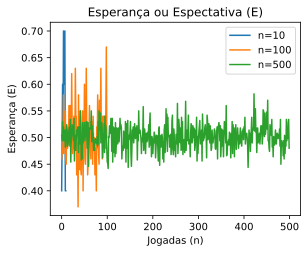

In [ ]:
import random
import torch
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l
import matplotlib.pyplot as plt  # This is python's popular plotting library.

plt.figure(2)
j=[10,100,500] # lançamentos
for n in j:
    E_x_lista = []
    for i in range(n):

        fair_probs = torch.tensor([0.5, 0.5])  # tensor de probabilidade justa: a chance é 0.5 a 0.5 de cair cara ou coroa
        P = Multinomial(n, fair_probs).sample() / n #
        P_head = P[0]
        P_tails = P[1]  # tails = coroa
        E_x = 0*P_head + 1*P_tails               # https://www.inf.ufsc.br/~andre.zibetti/probabilidade/variaveis_aleatorias.html
        print(E_x)
        E_x_lista.append(E_x.data)

        # torch.cat((x, y, z), 1)   # concatena os vetores x, y e z.

    x = list(range(n))
    plt.plot(x,E_x_lista, label=f'n={n}')

# --------
plt.legend()
plt.title('Esperança ou Espectativa (E)')
plt.ylabel('Esperança (E)')
plt.xlabel('Jogadas (n)')
plt.show()